In [1]:
## Imports
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing


In [2]:
all = pd.read_pickle("../climate_classifier/scored_data/votes_data_all_expanded_politician.pkl")
votes = pd.read_pickle("../climate_classifier/scored_data/votes_data_all.pkl")

In [3]:
votes["year"] = votes["date"].astype("str").str[:4]
print(len(votes))
votes = votes[votes["year"].astype("int")>=2012]


5559


In [4]:
all = all.reset_index(drop=True)
all["year"] = all["date"].astype("str").str[:4]
df = all[all["year"].astype("int")>=2012]

In [5]:
df[["For", "Absent", "Neither", "Against"]] = pd.get_dummies(df["vote"])
df.head(2)

C:\Users\COBOD\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,party,politician,vote,description,date,vote_id,y_pred,vote_id2,year,For,Absent,Neither,Against
0,Siumut (SIU),Aki-Matilda Høegh-Dam,Fraværende,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"Afstemning nr. 320, 2021-22",non-climate,2821,2022,0,1,0,0
1,Dansk Folkeparti (DF),Alex Ahrendtsen,For,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"Afstemning nr. 320, 2021-22",non-climate,2821,2022,1,0,0,0


In [6]:
df = df[["politician", "party", "For", "Against", "Neither", "Absent", "description", "vote_id2", "date", "y_pred"]]
df.sample(5)

,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred
107729,Simon Emil Ammitzbøll-Bille,Uden for folketingsgrupperne (UFG),0,0,0,1,Med lovforslaget gøres det muligt frivilligt a...,121,2020-12-21,non-climate
360424,Aleqa Hammond,Siumut (SIU),0,0,0,1,Folketingsbeslutningen pålægger regeringen ind...,4794,2016-05-19,non-climate
151102,Christian Juhl,Enhedslisten (EL),1,0,0,0,"Folketinget konstaterer, at der er områder i D...",5216,2019-12-13,non-climate
327026,Pernille Rosenkrantz-Theil,Socialdemokratiet (S),0,0,0,1,Lovforslaget indeholder flere elementer: Regle...,480,2016-12-23,climate
415879,Peter Skaarup,Dansk Folkeparti (DF),0,0,0,1,"Folketinget finder, at det skal være trygt, si...",2319,2015-03-24,non-climate


### General description

#### General stats

In [6]:
df.nunique()

politician      408
party            19
For               2
Against           2
Neither           2
Absent            2
description    3296
vote_id2       3296
date            725
y_pred            2
dtype: int64

In [7]:
#pd.DataFrame(df["politician"].unique()).to_csv("sanity_check_pol_votes.csv")

In [8]:
climate = df[df["y_pred"]=="climate"]
non_climate = df[df["y_pred"]=="non-climate"]
print(len(climate))
print(len(non_climate))
print(len(df))
climate.nunique()

42965
547101
590066


politician     398
party           19
For              2
Against          2
Neither          2
Absent           2
description    240
vote_id2       240
date           151
y_pred           1
dtype: int64

In [9]:
non_climate.nunique()

politician      406
party            19
For               2
Against           2
Neither           2
Absent            2
description    3056
vote_id2       3056
date            688
y_pred            1
dtype: int64

#### Distributions of vote-outcomes

In [10]:
parties_selection = ["Socialdemokratiet (S)", "Venstre (V)", "Socialistisk Folkeparti (SF)", "Det Konservative Folkeparti (KF)", "Dansk Folkeparti (DF)", "Enhedslisten (EL)"
                    ,"Det Radikale Venstre (RV)", "Alternativet (ALT)", "Liberal Alliance (LA)"]
print(len(df))
df_selection = df[df["party"].isin(parties_selection)]
df_selection
print(len(df_selection))
df_selection

590066
567350


,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred
1,Alex Ahrendtsen,Dansk Folkeparti (DF),1,0,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
2,Alex Vanopslagh,Liberal Alliance (LA),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
3,Anders Kronborg,Socialdemokratiet (S),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
4,Andreas Steenberg,Det Radikale Venstre (RV),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
5,Ane Halsboe-Jørgensen,Socialdemokratiet (S),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
...,...,...,...,...,...,...,...,...,...,...
590061,Ulla Tørnæs,Venstre (V),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate
590062,Villum Christensen,Liberal Alliance (LA),0,0,1,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate
590063,Villy Søvndal,Socialistisk Folkeparti (SF),0,0,0,1,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate
590064,Zenia Stampe,Det Radikale Venstre (RV),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate


In [11]:
df_agree = df_selection.groupby(["party","y_pred"]).sum()[["For", "Against", "Neither", "Absent"]]
df_agree.head(4)

For  Against  Neither   Absent
party                 y_pred                                         
Alternativet (ALT)    climate        357.0    191.0     21.0    358.0
                      non-climate   5193.0   2792.0    243.0   5521.0
Dansk Folkeparti (DF) climate       2392.0    982.0    135.0   2428.0
                      non-climate  35105.0  11782.0   1338.0  32763.0

In [12]:
df_agree["Total"] = df_agree["For"]+df_agree["Against"]+df_agree["Neither"]
df_agree["Agree"] = df_agree["For"]/df_agree["Total"]
df_agree["Indifferent"] = df_agree["Neither"]/df_agree["Total"]
df_agree["Disagree"] = df_agree["Against"]/df_agree["Total"]
df_agree["Absence"] = df_agree["Absent"]/df_agree["Total"]
df_agree = df_agree.append(pd.DataFrame(df_agree.sum(axis=0)).transpose())
df_agree["party"] = df_agree.index
df_agree

,For,Against,Neither,Absent,Total,Agree,Indifferent,Disagree,Absence,party
"(Alternativet (ALT), climate)",357.0,191.0,21.0,358.0,569.0,0.627417,0.036907,0.335677,0.629174,"(Alternativet (ALT), climate)"
"(Alternativet (ALT), non-climate)",5193.0,2792.0,243.0,5521.0,8228.0,0.631138,0.029533,0.339329,0.671001,"(Alternativet (ALT), non-climate)"
"(Dansk Folkeparti (DF), climate)",2392.0,982.0,135.0,2428.0,3509.0,0.681676,0.038472,0.279852,0.691935,"(Dansk Folkeparti (DF), climate)"
"(Dansk Folkeparti (DF), non-climate)",35105.0,11782.0,1338.0,32763.0,48225.0,0.727942,0.027745,0.244313,0.679378,"(Dansk Folkeparti (DF), non-climate)"
"(Det Konservative Folkeparti (KF), climate)",892.0,372.0,10.0,875.0,1274.0,0.700157,0.007849,0.291994,0.686813,"(Det Konservative Folkeparti (KF), climate)"
"(Det Konservative Folkeparti (KF), non-climate)",10732.0,4580.0,89.0,10263.0,15401.0,0.696838,0.005779,0.297383,0.666385,"(Det Konservative Folkeparti (KF), non-climate)"
"(Det Radikale Venstre (RV), climate)",1497.0,381.0,16.0,1301.0,1894.0,0.790391,0.008448,0.201162,0.686906,"(Det Radikale Venstre (RV), climate)"
"(Det Radikale Venstre (RV), non-climate)",16068.0,6975.0,224.0,15675.0,23267.0,0.690592,0.009627,0.299781,0.673701,"(Det Radikale Venstre (RV), non-climate)"
"(Enhedslisten (EL), climate)",1336.0,531.0,42.0,1213.0,1909.0,0.699843,0.022001,0.278156,0.635411,"(Enhedslisten (EL), climate)"
"(Enhedslisten (EL), non-climate)",14895.0,9216.0,713.0,15137.0,24824.0,0.600024,0.028722,0.371254,0.609773,"(Enhedslisten (EL), non-climate)"


In [13]:
df_agree[["Agree", "Indifferent", "Disagree", "Absence"]].describe()

,Agree,Indifferent,Disagree,Absence
count,19.000000,19.000000,19.000000,19.000000
mean,1.309769,0.031925,0.553043,1.261188
std,2.696615,0.066565,1.139661,2.596141
min,0.571429,0.005116,0.187788,0.609773
25%,0.676031,0.008544,0.279004,0.645903
50%,0.696838,0.014577,0.296070,0.671001
75%,0.715367,0.028234,0.324520,0.686860
max,12.442807,0.303289,5.253904,11.981284


In [14]:
df_agree_all = df_agree[["For", "Against", "Neither", "Absent"]]
df_agree_all = df_agree_all.groupby("y_pred").sum()
df_agree_all = df_agree_all.append(pd.DataFrame(df_agree_all.sum(axis=0)).transpose())
df_agree_all.head(4)


KeyError: 'y_pred'

In [ ]:
df_agree_all["Total"] = df_agree_all["For"]+df_agree_all["Against"]+df_agree_all["Neither"]
df_agree_all["Agree"] = df_agree_all["For"]/df_agree_all["Total"]
df_agree_all["Indifferent"] = df_agree_all["Neither"]/df_agree_all["Total"]
df_agree_all["Disagree"] = df_agree_all["Against"]/df_agree_all["Total"]
df_agree_all["Absence"] = df_agree_all["Absent"]/df_agree_all["Total"]
df_agree_all.head(4)

In [16]:
import seaborn as sns

<AxesSubplot:>

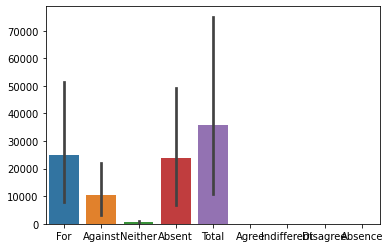

In [20]:
sns.barplot(data=df_agree)

#### Absence

In [7]:
parties_selection = ["Socialdemokratiet (S)", "Venstre (V)", "Socialistisk Folkeparti (SF)", "Det Konservative Folkeparti (KF)", "Dansk Folkeparti (DF)", "Enhedslisten (EL)"
                    ,"Det Radikale Venstre (RV)", "Alternativet (ALT)", "Liberal Alliance (LA)"]
print(len(df))
df_selection = df[df["party"].isin(parties_selection)]
df_selection
print(len(df_selection))
df_selection

590066
567350


,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred
1,Alex Ahrendtsen,Dansk Folkeparti (DF),1,0,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
2,Alex Vanopslagh,Liberal Alliance (LA),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
3,Anders Kronborg,Socialdemokratiet (S),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
4,Andreas Steenberg,Det Radikale Venstre (RV),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
5,Ane Halsboe-Jørgensen,Socialdemokratiet (S),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
...,...,...,...,...,...,...,...,...,...,...
590061,Ulla Tørnæs,Venstre (V),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate
590062,Villum Christensen,Liberal Alliance (LA),0,0,1,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate
590063,Villy Søvndal,Socialistisk Folkeparti (SF),0,0,0,1,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate
590064,Zenia Stampe,Det Radikale Venstre (RV),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate


In [8]:
df_abs = df_selection
df_abs['present'] = df_abs["Absent"].apply(lambda x: 1 if x == 0 else 0)
df_abs['no_votes'] = df_abs["For"] + df_abs["Against"] + df_abs["Neither"] + df_abs["Absent"]
df_abs_c = df_abs[df_abs["y_pred"]=="climate"]
print(len(df_abs_c))
print(len(df_abs))
df_abs

41125
567350


C:\Users\COBOD\AppData\Local\Temp\ipykernel_15020\3864179901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs['present'] = df_abs["Absent"].apply(lambda x: 1 if x == 0 else 0)
C:\Users\COBOD\AppData\Local\Temp\ipykernel_15020\3864179901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs['no_votes'] = df_abs["For"] + df_abs["Against"] + df_abs["Neither"] + df_abs["Absent"]


,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred,present,no_votes
1,Alex Ahrendtsen,Dansk Folkeparti (DF),1,0,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,1,1
2,Alex Vanopslagh,Liberal Alliance (LA),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1
3,Anders Kronborg,Socialdemokratiet (S),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,1,1
4,Andreas Steenberg,Det Radikale Venstre (RV),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,1,1
5,Ane Halsboe-Jørgensen,Socialdemokratiet (S),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
590061,Ulla Tørnæs,Venstre (V),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,1,1
590062,Villum Christensen,Liberal Alliance (LA),0,0,1,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,1,1
590063,Villy Søvndal,Socialistisk Folkeparti (SF),0,0,0,1,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1
590064,Zenia Stampe,Det Radikale Venstre (RV),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,1,1


In [9]:
to_join = df_abs.groupby(['politician', 'party']).count()

presence = df_abs.groupby(['politician', 'party']).sum()


presence['overall_presence'] = presence.apply(lambda x: x.present/x.no_votes, axis=1)
presence = presence[presence["no_votes"]>200]

bot20 = presence.sort_values(by="overall_presence").reset_index().head(20)[["politician", "party", "For", "Against", "Neither", "no_votes", "overall_presence"]]
bot20["politician"] = bot20["politician"].str.strip()
bot20


,politician,party,For,Against,Neither,no_votes,overall_presence
0,Lars Løkke Rasmussen,Venstre (V),32.0,10.0,0.0,2775.0,0.015135
1,Helle Thorning-Schmidt,Socialdemokratiet (S),18.0,2.0,0.0,1234.0,0.016207
2,Bjarne Corydon,Socialdemokratiet (S),41.0,23.0,0.0,1173.0,0.054561
3,Nicolai Wammen,Socialdemokratiet (S),207.0,71.0,3.0,3296.0,0.085255
4,Kristian Thulesen Dahl,Dansk Folkeparti (DF),242.0,100.0,4.0,3296.0,0.104976
5,Peter Skaarup,Dansk Folkeparti (DF),282.0,90.0,8.0,3296.0,0.115291
6,Pia Kjærsgaard,Dansk Folkeparti (DF),341.0,44.0,7.0,3294.0,0.119004
7,Morten Østergaard,Det Radikale Venstre (RV),271.0,85.0,1.0,2625.0,0.136000
8,Claus Hjort Frederiksen,Venstre (V),276.0,180.0,15.0,3296.0,0.142900
9,Martin Henriksen,Dansk Folkeparti (DF),241.0,100.0,20.0,2409.0,0.149855


In [10]:
top20 = presence.sort_values(by="overall_presence",ascending=False).reset_index().head(20)[["politician", "party", "For", "Against", "Neither", "no_votes", "overall_presence"]]
top20["politician"] = top20["politician"].str.strip()
top20

,politician,party,For,Against,Neither,no_votes,overall_presence
0,Hans Vestager,Det Radikale Venstre (RV),149.0,49.0,0.0,201.0,0.985075
1,Morten Dahlin,Venstre (V),548.0,278.0,21.0,887.0,0.954904
2,Malou Lunderød,Socialdemokratiet (S),224.0,90.0,9.0,341.0,0.947214
3,Eyvind Vesselbo,Venstre (V),713.0,293.0,20.0,1087.0,0.943882
4,Sanne Bjørn,Det Radikale Venstre (RV),118.0,80.0,2.0,212.0,0.943396
5,Per Husted,Socialdemokratiet (S),484.0,166.0,13.0,703.0,0.943101
6,Flemming Damgaard Larsen,Venstre (V),689.0,295.0,22.0,1087.0,0.925483
7,Kenneth Mikkelsen,Venstre (V),223.0,140.0,16.0,410.0,0.924390
8,Stén Knuth,Venstre (V),524.0,273.0,21.0,887.0,0.922210
9,Mads Andersen,Det Konservative Folkeparti (KF),133.0,94.0,0.0,258.0,0.879845


In [11]:
titles = pd.read_pickle("../data_collection/meetings/ft_meetings_2012-2022_clean_v2.2.pkl")
titles["politician"] = titles["politician"].str.strip()

In [12]:
titles_1 = titles.groupby("politician")["title"].unique().reset_index()
titles_2 = titles_1.groupby("politician")["title"].sum().reset_index()
titles_2.sample(10)

,politician,title
123,Henrik Vinther,[Member]
180,Karsten Hønge,[Member]
348,Serdal Benli,[Member]
60,Charlotte Broman Mølbæk,[Member]
400,Villy Søvndal,[Udenrigsministeren]
391,Trine Torp,[Member]
321,Pia Adelsteen,[Member]
147,Jeppe Jakobsen,[Member]
335,René Gade,[Member]
251,Martin Geertsen,[Member]


In [13]:
bot20_titles = bot20.merge(titles_2, how="left", on = "politician")
bot20_titles.head(10)

,politician,party,For,Against,Neither,no_votes,overall_presence,title
0,Lars Løkke Rasmussen,Venstre (V),32.0,10.0,0.0,2775.0,0.015135,"[Member, Statsministeren]"
1,Helle Thorning-Schmidt,Socialdemokratiet (S),18.0,2.0,0.0,1234.0,0.016207,[Statsministeren]
2,Bjarne Corydon,Socialdemokratiet (S),41.0,23.0,0.0,1173.0,0.054561,[Finansministeren]
3,Nicolai Wammen,Socialdemokratiet (S),207.0,71.0,3.0,3296.0,0.085255,"[Europaministeren, Forsvarsministeren, Member,..."
4,Kristian Thulesen Dahl,Dansk Folkeparti (DF),242.0,100.0,4.0,3296.0,0.104976,[Member]
5,Peter Skaarup,Dansk Folkeparti (DF),282.0,90.0,8.0,3296.0,0.115291,[Member]
6,Pia Kjærsgaard,Dansk Folkeparti (DF),341.0,44.0,7.0,3294.0,0.119004,[Member]
7,Morten Østergaard,Det Radikale Venstre (RV),271.0,85.0,1.0,2625.0,0.136000,"[Ministeren for forskning, innovation og vider..."
8,Claus Hjort Frederiksen,Venstre (V),276.0,180.0,15.0,3296.0,0.142900,"[Member, Finansministeren, Forsvarsministeren]"
9,Martin Henriksen,Dansk Folkeparti (DF),241.0,100.0,20.0,2409.0,0.149855,[Member]


In [14]:
top20_titles = top20.merge(titles_2, how="left", on = "politician")
top20_titles.head(20)

,politician,party,For,Against,Neither,no_votes,overall_presence,title
0,Hans Vestager,Det Radikale Venstre (RV),149.0,49.0,0.0,201.0,0.985075,[Member]
1,Morten Dahlin,Venstre (V),548.0,278.0,21.0,887.0,0.954904,[Member]
2,Malou Lunderød,Socialdemokratiet (S),224.0,90.0,9.0,341.0,0.947214,[Member]
3,Eyvind Vesselbo,Venstre (V),713.0,293.0,20.0,1087.0,0.943882,[Member]
4,Sanne Bjørn,Det Radikale Venstre (RV),118.0,80.0,2.0,212.0,0.943396,[Member]
5,Per Husted,Socialdemokratiet (S),484.0,166.0,13.0,703.0,0.943101,[Member]
6,Flemming Damgaard Larsen,Venstre (V),689.0,295.0,22.0,1087.0,0.925483,[Member]
7,Kenneth Mikkelsen,Venstre (V),223.0,140.0,16.0,410.0,0.924390,[Member]
8,Stén Knuth,Venstre (V),524.0,273.0,21.0,887.0,0.922210,[Member]
9,Mads Andersen,Det Konservative Folkeparti (KF),133.0,94.0,0.0,258.0,0.879845,[Member]


In [15]:
presence_c = df_abs_c.groupby(['politician', 'party']).sum()
votes_c = votes[votes["y_pred"]=="climate"]


presence_c['overall_presence'] = presence_c.apply(lambda x: x.present/x.no_votes, axis=1)
presence_c = presence_c[presence_c["no_votes"]>200]

top20_c = presence_c.sort_values(by="overall_presence").reset_index().head(20)[["politician", "party", "For", "Against", "Neither", "no_votes", "overall_presence"]]
top20_c["politician"] = top20_c["politician"].str.strip()
top20_c

,politician,party,For,Against,Neither,no_votes,overall_presence
0,Nicolai Wammen,Socialdemokratiet (S),11,3,0,240,0.058333
1,Claus Hjort Frederiksen,Venstre (V),15,7,1,240,0.095833
2,Pia Kjærsgaard,Dansk Folkeparti (DF),25,5,1,240,0.129167
3,Kristian Thulesen Dahl,Dansk Folkeparti (DF),13,17,1,240,0.129167
4,Peter Skaarup,Dansk Folkeparti (DF),21,14,1,240,0.150000
5,Mette Frederiksen,Socialdemokratiet (S),35,5,0,240,0.166667
6,Pia Olsen Dyhr,Socialistisk Folkeparti (SF),41,8,0,240,0.204167
7,Søren Espersen,Dansk Folkeparti (DF),28,22,0,239,0.209205
8,Kristian Jensen,Venstre (V),29,18,0,205,0.229268
9,Henrik Dam Kristensen,Socialdemokratiet (S),45,12,0,240,0.237500


In [16]:
top20_c_titles = top20_c.merge(titles_2, how="left", on = "politician")
top20_c_titles.head(10)

,politician,party,For,Against,Neither,no_votes,overall_presence,title
0,Nicolai Wammen,Socialdemokratiet (S),11,3,0,240,0.058333,"[Europaministeren, Forsvarsministeren, Member,..."
1,Claus Hjort Frederiksen,Venstre (V),15,7,1,240,0.095833,"[Member, Finansministeren, Forsvarsministeren]"
2,Pia Kjærsgaard,Dansk Folkeparti (DF),25,5,1,240,0.129167,[Member]
3,Kristian Thulesen Dahl,Dansk Folkeparti (DF),13,17,1,240,0.129167,[Member]
4,Peter Skaarup,Dansk Folkeparti (DF),21,14,1,240,0.150000,[Member]
5,Mette Frederiksen,Socialdemokratiet (S),35,5,0,240,0.166667,"[Beskæftigelsesministeren, Justitsministeren, ..."
6,Pia Olsen Dyhr,Socialistisk Folkeparti (SF),41,8,0,240,0.204167,"[Handels- og investeringsministeren, Transport..."
7,Søren Espersen,Dansk Folkeparti (DF),28,22,0,239,0.209205,[Member]
8,Kristian Jensen,Venstre (V),29,18,0,205,0.229268,"[Member, Udenrigsministeren, Finansministeren,..."
9,Henrik Dam Kristensen,Socialdemokratiet (S),45,12,0,240,0.237500,"[Transportministeren, Member, Beskæftigelsesmi..."


In [21]:
print(24598.0/41125.0)
df_abs_c[["no_votes", "present"]].sum()


0.5981276595744681


no_votes    41125
present     24598
dtype: int64

In [23]:
print(341026.0/567350.0)
df_abs[["no_votes", "present"]].sum()


0.6010857495373226


no_votes    567350
present     341026
dtype: int64